In [1]:
# importing relevant modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

### Full Dataset

In [2]:
#import csv full data
df_full_data = pd.read_csv("/Users/Lucasmeissner/Desktop/Capital Bike Share/CBS_2021-2023_Full.csv", sep= ',')
#/Users/Lucasmeissner/Desktop/Capital Bike Share/CBS_2021-2023_Full.csv

/var/folders/9f/6dlg3v0j3cd_qzf83z2xj_000000gn/T/ipykernel_29928/3590859912.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full_data = pd.read_csv("/Users/Lucasmeissner/Desktop/Capital Bike Share/CBS_2021-2023_Full.csv", sep= ',')


In [3]:
df_full_data.head(5)
#ride_id = unique number to identify the ride
#rideable_type= type of bike (classic, electric or docked bike)
#started_at = timestamp at which the ride started
#ended_at= timestamp at which the ride ended
#start_station_name = name of the station where the ride began
#start_station_id = unique number of the station where the ride began
#end_station_name = name of the station where the ride ended
#end_station_id = unique number of the station where the ride ended
#start_lat = geographical data (latitude) where the ride began
#start_lng = geographical data (longitutes) where the ride began
#end_lat = geographical data (latitude) where the ride ended
#end_lng =geographical data (longitute) where the ride ended
#member_casual = distringuish between reigstered member and unregistered casuals

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member


In [4]:
#dropping unncecessary columns to increase cpu performance and enable further analysis in tableau

df_full_data.drop(['ride_id','start_station_name','start_station_id','end_station_name','end_station_id','start_lat','start_lng','end_lat','end_lng'],axis=1,inplace=True)

In [5]:
#converting started_at and ended_at into datetime64[ns]

df_full_data['started_at']=df_full_data['started_at'].astype('datetime64[ns]')
df_full_data['ended_at']=df_full_data['ended_at'].astype('datetime64[ns]')

In [6]:
#Time per Ride
df_full_data['ride_duration'] = df_full_data['ended_at'] - df_full_data['started_at']

In [9]:
#import pandas as pd

# Assuming your dataset is stored in a DataFrame called df_full_data
# Convert 'started_at' column to datetime format
#df_full_data['started_at'] = pd.to_datetime(df_full_data['started_at'])
#df_full_data['ended_at'] = pd.to_datetime(df_full_data['ended_at'])

# Calculate ride duration in minutes
#df_full_data['ride_duration_minutes'] = (df_full_data['ended_at'] - df_full_data['started_at']).dt.total_seconds() / 60

# Group the data by day and count the occurrences of 'member' and 'casual' for each day
#grouped_by_day = df_full_data.groupby(df_full_data['started_at'].dt.date).agg(
 #   member_count=('member_casual', lambda x: (x == 'member').sum()),
  #  casual_count=('member_casual', lambda x: (x == 'casual').sum()),
   # mean_ride_duration_minutes=('ride_duration_minutes', 'mean'),
   # sum_ride_duration_minutes=('ride_duration_minutes', 'sum'),
    #classic_count=('rideable_type', lambda x: (x == 'classic_bike').sum()),
   # electric_count=('rideable_type', lambda x: (x == 'electric_bike').sum()),
    #docked_count=('rideable_type', lambda x: (x == 'docked_bike').sum())
#)

# Calculate count of other bikes (docked + classic)
#grouped_by_day['classic + docked_count'] = grouped_by_day['classic_count'] + grouped_by_day['docked_count']

# Calculate the total_count column
#grouped_by_day['total_count'] = grouped_by_day['member_count'] + grouped_by_day['casual_count']

# Reset index to make date a column instead of index
#grouped_by_day = grouped_by_day.reset_index()

# Display the DataFrame with counts and other metrics for each day
#grouped_by_day


,started_at,member_count,casual_count,mean_ride_duration_minutes,sum_ride_duration_minutes,classic_count,electric_count,docked_count,classic + docked_count,total_count
0,2021-01-01,590,371,17.262817,16589.566667,637,272,52,689,961
1,2021-01-02,2844,2874,38.135569,218059.183333,3970,1073,675,4645,5718
2,2021-01-03,1133,495,19.292158,31407.633333,1039,527,62,1101,1628
3,2021-01-04,2074,907,17.618573,52520.966667,2008,821,152,2160,2981
4,2021-01-05,2004,1057,24.239927,74198.416667,1980,868,213,2193,3061
...,...,...,...,...,...,...,...,...,...,...
1090,2023-12-27,1934,646,14.194587,36622.033333,1135,1445,0,1135,2580
1091,2023-12-28,4819,3099,19.735146,156262.883333,4236,3682,0,4236,7918
1092,2023-12-29,5168,3491,20.470845,177257.050000,4381,4278,0,4381,8659
1093,2023-12-30,4497,3097,18.053724,137099.983333,3803,3791,0,3803,7594


In [7]:
# Assuming your dataset is stored in a DataFrame called df_full_data
# Convert 'started_at' column to datetime format
df_full_data['started_at'] = pd.to_datetime(df_full_data['started_at'])
df_full_data['ended_at'] = pd.to_datetime(df_full_data['ended_at'])

# Calculate ride duration in minutes
df_full_data['ride_duration_minutes'] = (df_full_data['ended_at'] - df_full_data['started_at']).dt.total_seconds() / 60

# Group the data by day and count the occurrences of 'member' and 'casual' for each day
grouped_by_day = df_full_data.groupby(df_full_data['started_at'].dt.date).agg(
    member_count=('member_casual', lambda x: (x == 'member').sum()),
    casual_count=('member_casual', lambda x: (x == 'casual').sum()),
    mean_ride_duration_minutes=('ride_duration_minutes', 'mean'),
    sum_ride_duration_minutes=('ride_duration_minutes', 'sum'),
    classic_count=('rideable_type', lambda x: (x == 'classic_bike').sum()),
    electric_count=('rideable_type', lambda x: (x == 'electric_bike').sum()),
    docked_count=('rideable_type', lambda x: (x == 'docked_bike').sum()),
    mean_ride_duration_electric=('ride_duration_minutes', lambda x: x[df_full_data['rideable_type'] == 'electric_bike'].mean()),
    mean_ride_duration_classic_docked=('ride_duration_minutes', lambda x: x[df_full_data['rideable_type'].isin(['classic_bike', 'docked_bike'])].mean()),
    sum_ride_duration_electric=('ride_duration_minutes', lambda x: x[df_full_data['rideable_type'] == 'electric_bike'].sum()),
    sum_ride_duration_classic_docked=('ride_duration_minutes', lambda x: x[df_full_data['rideable_type'].isin(['classic_bike', 'docked_bike'])].sum())
)

# Calculate count of other bikes (docked + classic)
grouped_by_day['classic + docked_count'] = grouped_by_day['classic_count'] + grouped_by_day['docked_count']

# Calculate the total_count column
grouped_by_day['total_count'] = grouped_by_day['member_count'] + grouped_by_day['casual_count']

# Reset index to make date a column instead of index
grouped_by_day = grouped_by_day.reset_index()

# Display the DataFrame with counts and other metrics for each day
grouped_by_day


,started_at,member_count,casual_count,mean_ride_duration_minutes,sum_ride_duration_minutes,classic_count,electric_count,docked_count,mean_ride_duration_electric,mean_ride_duration_classic_docked,sum_ride_duration_electric,sum_ride_duration_classic_docked,classic + docked_count,total_count
0,2021-01-01,590,371,17.262817,16589.566667,637,272,52,16.085172,17.727721,4375.166667,12214.400000,689,961
1,2021-01-02,2844,2874,38.135569,218059.183333,3970,1073,675,22.425132,41.764697,24062.166667,193997.016667,4645,5718
2,2021-01-03,1133,495,19.292158,31407.633333,1039,527,62,16.799715,20.485180,8853.450000,22554.183333,1101,1628
3,2021-01-04,2074,907,17.618573,52520.966667,2008,821,152,15.672716,18.358179,12867.300000,39653.666667,2160,2981
4,2021-01-05,2004,1057,24.239927,74198.416667,1980,868,213,17.123157,27.056779,14862.900000,59335.516667,2193,3061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2023-12-27,1934,646,14.194587,36622.033333,1135,1445,0,11.894141,17.123348,17187.033333,19435.000000,1135,2580
1091,2023-12-28,4819,3099,19.735146,156262.883333,4236,3682,0,14.958143,23.887394,55075.883333,101187.000000,4236,7918
1092,2023-12-29,5168,3491,20.470845,177257.050000,4381,4278,0,14.159580,26.633729,60574.683333,116682.366667,4381,8659
1093,2023-12-30,4497,3097,18.053724,137099.983333,3803,3791,0,13.329188,22.763353,50530.950000,86569.033333,3803,7594


In [8]:
#save as csv as code above needs 45 mins to run

grouped_by_day.to_csv('grouped_by_day_counts_mean_sum.csv', index=False,sep=',')

In [8]:
#reimport csv saved previously

grouped_by_day_final = pd.read_csv("/Users/Lucasmeissner/Desktop/Blue_Berry_Winery/wine+quality/grouped_by_day_counts_mean_sum.csv", sep= ',')


In [28]:
grouped_by_day_final=grouped_by_day.copy()

In [9]:
grouped_by_day_final

,started_at,member_count,casual_count,mean_ride_duration_minutes,sum_ride_duration_minutes,classic_count,electric_count,docked_count,mean_ride_duration_electric,mean_ride_duration_classic_docked,sum_ride_duration_electric,sum_ride_duration_classic_docked,classic + docked_count,total_count
0,2021-01-01,590,371,17.262817,16589.566667,637,272,52,16.085172,17.727721,4375.166667,12214.400000,689,961
1,2021-01-02,2844,2874,38.135569,218059.183333,3970,1073,675,22.425132,41.764697,24062.166667,193997.016667,4645,5718
2,2021-01-03,1133,495,19.292158,31407.633333,1039,527,62,16.799715,20.485180,8853.450000,22554.183333,1101,1628
3,2021-01-04,2074,907,17.618573,52520.966667,2008,821,152,15.672716,18.358179,12867.300000,39653.666667,2160,2981
4,2021-01-05,2004,1057,24.239927,74198.416667,1980,868,213,17.123157,27.056779,14862.900000,59335.516667,2193,3061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2023-12-27,1934,646,14.194587,36622.033333,1135,1445,0,11.894141,17.123348,17187.033333,19435.000000,1135,2580
1091,2023-12-28,4819,3099,19.735146,156262.883333,4236,3682,0,14.958143,23.887394,55075.883333,101187.000000,4236,7918
1092,2023-12-29,5168,3491,20.470845,177257.050000,4381,4278,0,14.159580,26.633729,60574.683333,116682.366667,4381,8659
1093,2023-12-30,4497,3097,18.053724,137099.983333,3803,3791,0,13.329188,22.763353,50530.950000,86569.033333,3803,7594


In [19]:
# Assuming your dataset is stored in a DataFrame called df_full_data
# Convert 'started_at' column to datetime format
#df_full_data['started_at'] = pd.to_datetime(df_full_data['started_at'])
#df_full_data['ended_at'] = pd.to_datetime(df_full_data['ended_at'])

# Calculate ride duration in minutes
#df_full_data['ride_duration_minutes'] = (df_full_data['ended_at'] - df_full_data['started_at']).dt.total_seconds() / 60

# Group the data by day and count the occurrences of 'member' and 'casual' for each day
#grouped_by_day = df_full_data.groupby(df_full_data['started_at'].dt.date).agg(
 #   member_count=('member_casual', lambda x: (x == 'member').sum()),
  #  casual_count=('member_casual', lambda x: (x == 'casual').sum()),
   # mean_ride_duration_minutes=('ride_duration_minutes', 'mean'),
   # sum_ride_duration_minutes=('ride_duration_minutes', 'sum'),
   # classic_count=('rideable_type', lambda x: (x == 'classic_bike').sum()),
   # electric_count=('rideable_type', lambda x: (x == 'electric_bike').sum()),
   # docked_count=('rideable_type', lambda x: (x == 'docked_bike').sum())
)
# Calculate count of other bikes (docked + classic)
#grouped_by_day['classic + docked_count'] = grouped_by_day['classic_count'] + grouped_by_day['docked_count']

# Calculate the total_count column
#grouped_by_day['total_count'] = grouped_by_day['member_count'] + grouped_by_day['casual_count']

# Reset index to make date a column instead of index
#grouped_by_day = grouped_by_day.reset_index()

# Display the DataFrame with counts and other metrics for each day
#grouped_by_day

,started_at,member_count,casual_count,mean_ride_duration_minutes,sum_ride_duration_minutes,classic_count,electric_count,docked_count,classic + docked_count,total_count
0,2021-01-01,590,371,17.262817,16589.566667,637,272,52,689,961
1,2021-01-02,2844,2874,38.135569,218059.183333,3970,1073,675,4645,5718
2,2021-01-03,1133,495,19.292158,31407.633333,1039,527,62,1101,1628
3,2021-01-04,2074,907,17.618573,52520.966667,2008,821,152,2160,2981
4,2021-01-05,2004,1057,24.239927,74198.416667,1980,868,213,2193,3061
...,...,...,...,...,...,...,...,...,...,...
1090,2023-12-27,1934,646,14.194587,36622.033333,1135,1445,0,1135,2580
1091,2023-12-28,4819,3099,19.735146,156262.883333,4236,3682,0,4236,7918
1092,2023-12-29,5168,3491,20.470845,177257.050000,4381,4278,0,4381,8659
1093,2023-12-30,4497,3097,18.053724,137099.983333,3803,3791,0,3803,7594


In [10]:
#creating features

#average weight of americans https://news.gallup.com/poll/328241/americans-average-weight-holds-steady-2020.aspx
#200 pounds for men
#162 pounds for women
#181 pounds mixed

#calories burned for 30 min outdoor biking ride https://www.healthline.com/health/how-many-calories-do-you-burn-biking#indoor-biking

#A person may burn slightly more calories when bicycling outside. Bicycling at a moderate pace outdoors may burn the following number of calories over a 30-minute time span:

#• 125 pounds: 240 calories

#• 155 pounds: 298 calories

#• 185 pounds: 355 calories

#we chose to take the 185 pounds for our calculation as we can only take an average since we do not have genderspecification or weight for the members/casuals

#calories multiplier = #355 calories /30 min = 11.8333 calories/min for classic bikes
#calories multiplier = 100 calories/60 min = 1.66666666667

#saved space traffic jam 

#https://www.motor1.com/news/707996/vehicles-larger-than-ever-usa-europe/

#average length of an american car

#length= 5243mm =5,2343 m/per car 
#width = 1958 mm/per car
#sqm= 5,243m * 1,958 m =approx. 10.27 sqm rounded to 2 decial after comma

#CO2 reduction 

#average CO2 Use of a car per min https://8billiontrees.com/carbon-offsets-credits/how-much-co2-does-a-car-emit-per-mile/#:~:text=How%20Much%20CO2%20Does%20a%20Car%20Emit%20per%20Minute%3F

#31290mg/min

import pandas as pd

# Assuming your dataset is stored in a DataFrame called grouped_by_day_final

# Calculate new columns
grouped_by_day_final['calories_burned_mean_electric_classic_docked'] = grouped_by_day_final['mean_ride_duration_classic_docked'] * 11.833
grouped_by_day_final['calories_burned_sum_classic_docked'] = grouped_by_day_final['sum_ride_duration_classic_docked'] * 11.833
grouped_by_day_final['calories_burned_mean_electric'] = grouped_by_day_final['mean_ride_duration_electric'] * 1.66666666667
grouped_by_day_final['calories_burned_sum_classic_electric'] = grouped_by_day_final['sum_ride_duration_electric'] * 1.66666666667
grouped_by_day_final['saved_space_sum_in_m'] = grouped_by_day_final['total_count'] * 10.27 #sqm
grouped_by_day_final['saved_space_mean_in_m'] = 10.27 #sqm
grouped_by_day_final['saved_CO2_mean_in_mg'] = grouped_by_day_final['mean_ride_duration_minutes'] * 31290/1000000 #didvided by 1000000 to convert mg into kg
grouped_by_day_final['saved_CO2_sum_in_mg'] = grouped_by_day_final['sum_ride_duration_minutes'] * 31290/1000000

# Display the DataFrame with new columns
grouped_by_day_final


,started_at,member_count,casual_count,mean_ride_duration_minutes,sum_ride_duration_minutes,classic_count,electric_count,docked_count,mean_ride_duration_electric,mean_ride_duration_classic_docked,...,classic + docked_count,total_count,calories_burned_mean_electric_classic_docked,calories_burned_sum_classic_docked,calories_burned_mean_electric,calories_burned_sum_classic_electric,saved_space_sum_in_m,saved_space_mean_in_m,saved_CO2_mean_in_mg,saved_CO2_sum_in_mg
0,2021-01-01,590,371,17.262817,16589.566667,637,272,52,16.085172,17.727721,...,689,961,209.772127,1.445330e+05,26.808619,7291.944444,9869.47,10.27,0.540154,519.087541
1,2021-01-02,2844,2874,38.135569,218059.183333,3970,1073,675,22.425132,41.764697,...,4645,5718,494.201657,2.295567e+06,37.375220,40103.611111,58723.86,10.27,1.193262,6823.071846
2,2021-01-03,1133,495,19.292158,31407.633333,1039,527,62,16.799715,20.485180,...,1101,1628,242.401137,2.668837e+05,27.999526,14755.750000,16719.56,10.27,0.603652,982.744847
3,2021-01-04,2074,907,17.618573,52520.966667,2008,821,152,15.672716,18.358179,...,2160,2981,217.232332,4.692218e+05,26.121194,21445.500000,30614.87,10.27,0.551285,1643.381047
4,2021-01-05,2004,1057,24.239927,74198.416667,1980,868,213,17.123157,27.056779,...,2193,3061,320.162868,7.021172e+05,28.538594,24771.500000,31436.47,10.27,0.758467,2321.668457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2023-12-27,1934,646,14.194587,36622.033333,1135,1445,0,11.894141,17.123348,...,1135,2580,202.620577,2.299744e+05,19.823568,28645.055556,26496.60,10.27,0.444149,1145.903423
1091,2023-12-28,4819,3099,19.735146,156262.883333,4236,3682,0,14.958143,23.887394,...,4236,7918,282.659530,1.197346e+06,24.930239,91793.138889,81317.86,10.27,0.617513,4889.465619
1092,2023-12-29,5168,3491,20.470845,177257.050000,4381,4278,0,14.159580,26.633729,...,4381,8659,315.156915,1.380702e+06,23.599300,100957.805556,88927.93,10.27,0.640533,5546.373094
1093,2023-12-30,4497,3097,18.053724,137099.983333,3803,3791,0,13.329188,22.763353,...,3803,7594,269.358762,1.024371e+06,22.215313,84218.250000,77990.38,10.27,0.564901,4289.858479


In [11]:
#renaming columns properly for tableau analysis
import pandas as pd

grouped_by_day_final.rename(columns={'started_at': 'date'}, inplace=True)
grouped_by_day_final.rename(columns={'member_count': 'member_rides'}, inplace=True)
grouped_by_day_final.rename(columns={'casual_count': 'casual_rides'}, inplace=True)
grouped_by_day_final.rename(columns={'mean_ride_duration_minutes': 'mean_duration_in_min'}, inplace=True)
grouped_by_day_final.rename(columns={'sum_ride_duration_minutes': 'sum_duration_in_min'}, inplace=True)
grouped_by_day_final.rename(columns={'classic_count': 'classic_rides'}, inplace=True)
grouped_by_day_final.rename(columns={'electric_count': 'electric_rides'}, inplace=True)
grouped_by_day_final.rename(columns={'docked_count': 'docked_rides'}, inplace=True)
grouped_by_day_final.rename(columns={'mean_ride_duration_electric': 'mean_duration_electric'}, inplace=True)
grouped_by_day_final.rename(columns={'mean_ride_duration_classic_docked': 'mean_duration_classic_docked'}, inplace=True)
grouped_by_day_final.rename(columns={'calories_burned_mean_electric_classic_docked': 'mean_classic_docked_calories_burned'}, inplace=True)
grouped_by_day_final.rename(columns={'calories_burned_sum_classic_docked': 'sum_classic_docked_calories_burned'}, inplace=True)
grouped_by_day_final.rename(columns={'calories_burned_mean_electric': 'mean_electric_calories_burned'}, inplace=True)
grouped_by_day_final.rename(columns={'calories_burned_sum_classic_electric': 'sum_electric_calories_burned'}, inplace=True)
grouped_by_day_final.rename(columns={'saved_space_sum_in_m': 'sum_saved_space_in_m²'}, inplace=True)
grouped_by_day_final.rename(columns={'saved_space_mean_in_m': 'mean_saved_space_in_m²'}, inplace=True)
grouped_by_day_final.rename(columns={'saved_CO2_mean_in_mg': 'mean_saved_CO2_in_kg'}, inplace=True)
grouped_by_day_final.rename(columns={'saved_CO2_sum_in_mg': 'sum_saved_CO2_in_kg'}, inplace=True)
grouped_by_day_final.rename(columns={'sum_ride_duration_electric': 'sum_duration_electric'}, inplace=True)
grouped_by_day_final.rename(columns={'sum_ride_duration_classic_docked': 'sum_duration_classic_docked'}, inplace=True)

#sum_ride_duration_electric	sum_ride_duration_classic_docked

# Display the DataFrame with the renamed column
grouped_by_day_final

,date,member_rides,casual_rides,mean_duration_in_min,sum_duration_in_min,classic_rides,electric_rides,docked_rides,mean_duration_electric,mean_duration_classic_docked,...,classic + docked_count,total_count,mean_classic_docked_calories_burned,sum_classic_docked_calories_burned,mean_electric_calories_burned,sum_electric_calories_burned,sum_saved_space_in_m²,mean_saved_space_in_m²,mean_saved_CO2_in_kg,sum_saved_CO2_in_kg
0,2021-01-01,590,371,17.262817,16589.566667,637,272,52,16.085172,17.727721,...,689,961,209.772127,1.445330e+05,26.808619,7291.944444,9869.47,10.27,0.540154,519.087541
1,2021-01-02,2844,2874,38.135569,218059.183333,3970,1073,675,22.425132,41.764697,...,4645,5718,494.201657,2.295567e+06,37.375220,40103.611111,58723.86,10.27,1.193262,6823.071846
2,2021-01-03,1133,495,19.292158,31407.633333,1039,527,62,16.799715,20.485180,...,1101,1628,242.401137,2.668837e+05,27.999526,14755.750000,16719.56,10.27,0.603652,982.744847
3,2021-01-04,2074,907,17.618573,52520.966667,2008,821,152,15.672716,18.358179,...,2160,2981,217.232332,4.692218e+05,26.121194,21445.500000,30614.87,10.27,0.551285,1643.381047
4,2021-01-05,2004,1057,24.239927,74198.416667,1980,868,213,17.123157,27.056779,...,2193,3061,320.162868,7.021172e+05,28.538594,24771.500000,31436.47,10.27,0.758467,2321.668457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2023-12-27,1934,646,14.194587,36622.033333,1135,1445,0,11.894141,17.123348,...,1135,2580,202.620577,2.299744e+05,19.823568,28645.055556,26496.60,10.27,0.444149,1145.903423
1091,2023-12-28,4819,3099,19.735146,156262.883333,4236,3682,0,14.958143,23.887394,...,4236,7918,282.659530,1.197346e+06,24.930239,91793.138889,81317.86,10.27,0.617513,4889.465619
1092,2023-12-29,5168,3491,20.470845,177257.050000,4381,4278,0,14.159580,26.633729,...,4381,8659,315.156915,1.380702e+06,23.599300,100957.805556,88927.93,10.27,0.640533,5546.373094
1093,2023-12-30,4497,3097,18.053724,137099.983333,3803,3791,0,13.329188,22.763353,...,3803,7594,269.358762,1.024371e+06,22.215313,84218.250000,77990.38,10.27,0.564901,4289.858479


In [15]:
#exporting dataset to use for further analysis in tableau
grouped_by_day_final.to_csv('grouped_by_day_final_50.0.csv', index=False,sep=',')

### Daily Weather

In [4]:
#import CSV daily weather
df_daily_weather= pd.read_csv("/Users/Lucasmeissner/Desktop/Capital Bike Share/CBS_2021-2023_Daily_Weather.csv", sep= ',')

In [7]:
df_daily_weather.shape

#1095 rows
#8 coulmns

(1095, 8)

In [8]:
df_daily_weather.head(5)

#casual = number of casual (unregistered) riders per day
#member = number of (registered) riders per day
#date = date (daily)
#total_rides = total number of casual and member rides
#apparent_temperature_mean (°C)	= mean of 'felt' temperature
#temperature_2m_mean (°C) = mean of real temperature as measured 2m above the ground
#weathercode (wmo code)	= code that declares the weather -->             more information here: https://www.nodc.noaa.gov/archive/arc0021/0002199/1.1/data/0-data/HTML/WMO-CODE/WMO4677.HTM
#windspeed_10m_max (km/h) = windspeed in km/H

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h)
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2


In [5]:
#rename columns into lower case letters
df_daily_weather.rename(inplace=True,columns={
    'Casual': 'casual',
    'Date': 'date',
    'Member': 'member',
    'Total_rides': 'total_rides'
})

In [6]:
#adding year,month,week,weekday,holiday,workday,season for further analysis

import pandas as pd
from datetime import datetime

# Assuming your dataset is stored in a DataFrame called df_daily_weather
# Convert 'date' column to datetime format if it's not already in datetime format
df_daily_weather['date'] = pd.to_datetime(df_daily_weather['date'])

# Define a function to check if a given date is a holiday in Washington DC
def is_holiday(date):
    holidays = [
        datetime(2021, 1, 1),  # New Year's Day
        datetime(2021, 7, 4),  # Independence Day
        datetime(2021, 11, 25),  # Thanksgiving Day
        datetime(2021, 12, 25),  # Christmas Day
        datetime(2022, 1, 1),
        datetime(2022, 7, 4),
        datetime(2022, 11, 24),
        datetime(2022, 12, 25),
        datetime(2023, 1, 1),
        datetime(2023, 7, 4),
        datetime(2023, 11, 23),
        datetime(2023, 12, 25)
        # Add more holidays as needed
    ]
    return date in holidays

# Define a function to check if a given date is a workday
def is_workday(date):
    # Check if the day is Monday to Friday and not a holiday
    return date.dayofweek < 5 and not is_holiday(date)

# Define a function to determine the season based on the month
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

# Create day, week, month, year, day_of_week, is_weekend, is_holiday, is_workday, and season columns
df_daily_weather['day'] = df_daily_weather['date'].dt.day
df_daily_weather['week'] = df_daily_weather['date'].dt.isocalendar().week
df_daily_weather['month'] = df_daily_weather['date'].dt.month
df_daily_weather['year'] = df_daily_weather['date'].dt.year
df_daily_weather['day_of_week'] = df_daily_weather['date'].dt.day_name()
df_daily_weather['is_weekend'] = df_daily_weather['date'].dt.dayofweek.isin([5, 6]).astype(int)  # Convert boolean to integer (0 or 1)
df_daily_weather['is_holiday'] = df_daily_weather['date'].apply(is_holiday).astype(int)  # Check if date is holiday and convert boolean to integer
df_daily_weather['is_workday'] = df_daily_weather['date'].apply(is_workday).astype(int)  # Check if date is workday and convert boolean to integer
df_daily_weather['season'] = df_daily_weather['month'].apply(get_season)

# Display the updated DataFrame
df_daily_weather







,casual,date,member,total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),day,week,month,year,day_of_week,is_weekend,is_holiday,is_workday,season
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,53,1,2021,Friday,0,1,0,Winter
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,2,53,1,2021,Saturday,1,0,0,Winter
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,3,53,1,2021,Sunday,1,0,0,Winter
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,4,1,1,2021,Monday,0,0,1,Winter
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,5,1,1,2021,Tuesday,0,0,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,646,2023-12-27,1934,2580,-8.6,-4.3,71,10.1,27,52,12,2023,Wednesday,0,0,1,Winter
1091,3099,2023-12-28,4819,7918,-7.0,-2.5,0,12.8,28,52,12,2023,Thursday,0,0,1,Winter
1092,3491,2023-12-29,5168,8659,-7.8,-3.9,1,9.5,29,52,12,2023,Friday,0,0,1,Winter
1093,3097,2023-12-30,4497,7594,-7.3,-2.9,1,13.8,30,52,12,2023,Saturday,1,0,0,Winter


In [7]:
# Create dummies for the 'season' column
season_dummies = pd.get_dummies(df_daily_weather['season'], prefix='season')

# Concatenate the dummies with the original DataFrame
df_daily_weather = pd.concat([df_daily_weather, season_dummies], axis=1)

# Convert boolean columns to numeric values
df_daily_weather['season_Autumn'] = df_daily_weather['season_Autumn'].astype(int)
df_daily_weather['season_Spring'] = df_daily_weather['season_Spring'].astype(int)
df_daily_weather['season_Summer'] = df_daily_weather['season_Summer'].astype(int)
df_daily_weather['season_Winter'] = df_daily_weather['season_Winter'].astype(int)

# Display the DataFrame
df_daily_weather


,casual,date,member,total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),day,week,...,year,day_of_week,is_weekend,is_holiday,is_workday,season,season_Autumn,season_Spring,season_Summer,season_Winter
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,53,...,2021,Friday,0,1,0,Winter,0,0,0,1
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,2,53,...,2021,Saturday,1,0,0,Winter,0,0,0,1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,3,53,...,2021,Sunday,1,0,0,Winter,0,0,0,1
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,4,1,...,2021,Monday,0,0,1,Winter,0,0,0,1
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,5,1,...,2021,Tuesday,0,0,1,Winter,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,646,2023-12-27,1934,2580,-8.6,-4.3,71,10.1,27,52,...,2023,Wednesday,0,0,1,Winter,0,0,0,1
1091,3099,2023-12-28,4819,7918,-7.0,-2.5,0,12.8,28,52,...,2023,Thursday,0,0,1,Winter,0,0,0,1
1092,3491,2023-12-29,5168,8659,-7.8,-3.9,1,9.5,29,52,...,2023,Friday,0,0,1,Winter,0,0,0,1
1093,3097,2023-12-30,4497,7594,-7.3,-2.9,1,13.8,30,52,...,2023,Saturday,1,0,0,Winter,0,0,0,1


In [8]:
#categorize weather to wmo code https://www.nodc.noaa.gov/archive/arc0021/0002199/1.1/df_daily_weather/0-df_daily_weather/HTML/WMO-CODE/WMO4677.HTM

#0-3 = no rain
#51-55 = drizzle
#61-65 = rain
#71-75 = snow

import pandas as pd

# Define the bins and corresponding labels
bins = [0, 4, 56, 66, 76]
labels = ['no rain', 'drizzle', 'rain', 'snow']

# Categorize the 'wmo code' column
df_daily_weather['weather_category'] = pd.cut(df_daily_weather['weathercode (wmo code)'], bins=bins, labels=labels, right=False)

# Display the result
print(df_daily_weather)


      casual       date  member  total_rides  apparent_temperature_mean (°C)  \
0        371 2021-01-01     590          961                            -0.9   
1       2874 2021-01-02    2844         5718                             4.8   
2        495 2021-01-03    1133         1628                             0.9   
3        907 2021-01-04    2074         2981                             1.0   
4       1057 2021-01-05    2004         3061                             1.4   
...      ...        ...     ...          ...                             ...   
1090     646 2023-12-27    1934         2580                            -8.6   
1091    3099 2023-12-28    4819         7918                            -7.0   
1092    3491 2023-12-29    5168         8659                            -7.8   
1093    3097 2023-12-30    4497         7594                            -7.3   
1094    2839 2023-12-31    4488         7327                            -8.9   

      temperature_2m_mean (°C)  weather

In [9]:
# Create dummies for the 'weather category' column
weather_dummies = pd.get_dummies(df_daily_weather['weather_category'], prefix='weather_category')

# Concatenate the dummies with the original DataFrame
df_daily_weather = pd.concat([df_daily_weather, weather_dummies], axis=1)

# Convert boolean columns to numeric values
df_daily_weather['weather_category_drizzle'] = df_daily_weather['weather_category_drizzle'].astype(int)
df_daily_weather['weather_category_no rain'] = df_daily_weather['weather_category_no rain'].astype(int)
df_daily_weather['weather_category_rain'] = df_daily_weather['weather_category_rain'].astype(int)
df_daily_weather['weather_category_snow'] = df_daily_weather['weather_category_snow'].astype(int)

df_daily_weather

,casual,date,member,total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),day,week,...,season,season_Autumn,season_Spring,season_Summer,season_Winter,weather_category,weather_category_no rain,weather_category_drizzle,weather_category_rain,weather_category_snow
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,53,...,Winter,0,0,0,1,rain,0,0,1,0
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,2,53,...,Winter,0,0,0,1,rain,0,0,1,0
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,3,53,...,Winter,0,0,0,1,rain,0,0,1,0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,4,1,...,Winter,0,0,0,1,no rain,1,0,0,0
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,5,1,...,Winter,0,0,0,1,drizzle,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,646,2023-12-27,1934,2580,-8.6,-4.3,71,10.1,27,52,...,Winter,0,0,0,1,snow,0,0,0,1
1091,3099,2023-12-28,4819,7918,-7.0,-2.5,0,12.8,28,52,...,Winter,0,0,0,1,no rain,1,0,0,0
1092,3491,2023-12-29,5168,8659,-7.8,-3.9,1,9.5,29,52,...,Winter,0,0,0,1,no rain,1,0,0,0
1093,3097,2023-12-30,4497,7594,-7.3,-2.9,1,13.8,30,52,...,Winter,0,0,0,1,no rain,1,0,0,0


In [10]:
df_corr=df_daily_weather.copy()

In [11]:
df_corr

,casual,date,member,total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),day,week,...,season,season_Autumn,season_Spring,season_Summer,season_Winter,weather_category,weather_category_no rain,weather_category_drizzle,weather_category_rain,weather_category_snow
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,53,...,Winter,0,0,0,1,rain,0,0,1,0
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,2,53,...,Winter,0,0,0,1,rain,0,0,1,0
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,3,53,...,Winter,0,0,0,1,rain,0,0,1,0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,4,1,...,Winter,0,0,0,1,no rain,1,0,0,0
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,5,1,...,Winter,0,0,0,1,drizzle,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,646,2023-12-27,1934,2580,-8.6,-4.3,71,10.1,27,52,...,Winter,0,0,0,1,snow,0,0,0,1
1091,3099,2023-12-28,4819,7918,-7.0,-2.5,0,12.8,28,52,...,Winter,0,0,0,1,no rain,1,0,0,0
1092,3491,2023-12-29,5168,8659,-7.8,-3.9,1,9.5,29,52,...,Winter,0,0,0,1,no rain,1,0,0,0
1093,3097,2023-12-30,4497,7594,-7.3,-2.9,1,13.8,30,52,...,Winter,0,0,0,1,no rain,1,0,0,0


In [12]:
df_corr.drop(['day_of_week','season','casual','member','day','week','month','year','weathercode (wmo code)','weather_category'],axis=1,inplace=True)

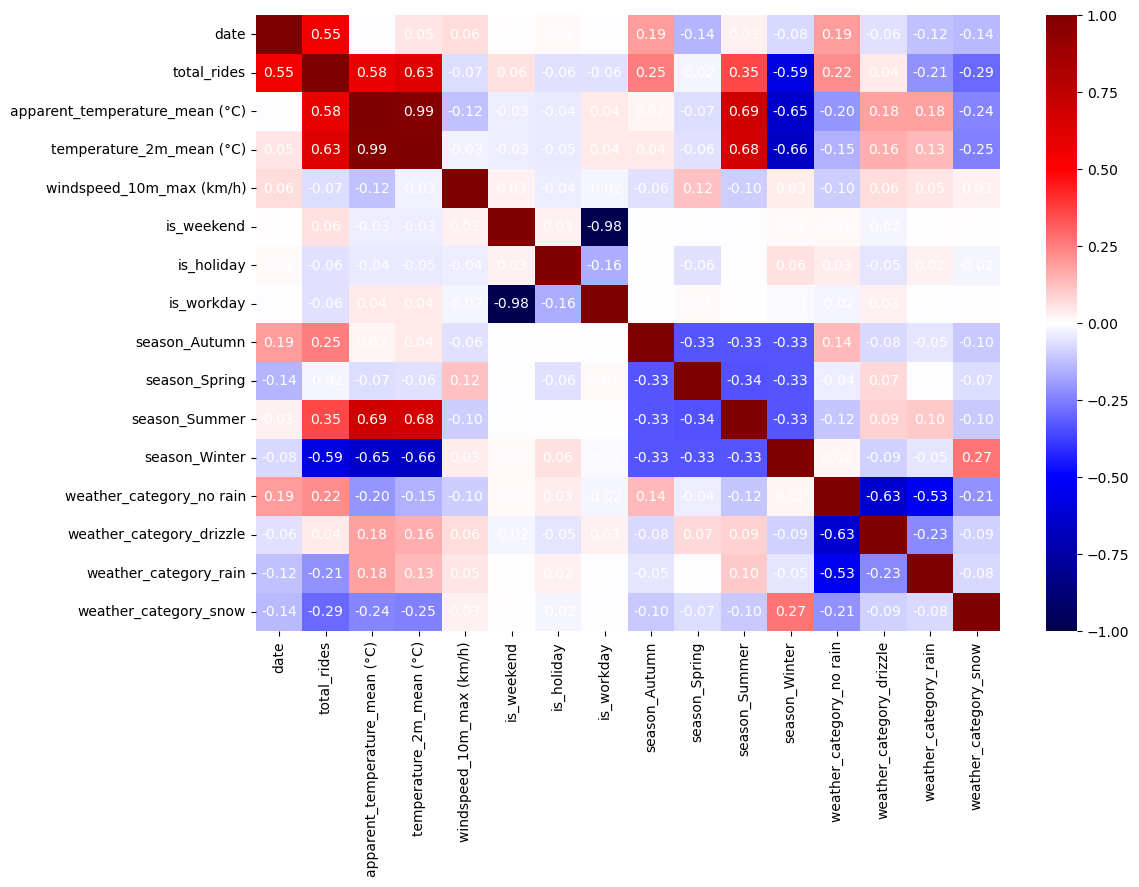

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Iterate over each pair of columns and calculate correlation
for i, col1 in enumerate(df_corr.columns):
    for j, col2 in enumerate(df_corr.columns):
        if i != j:
            correlation = df_corr[col1].corr(df_corr[col2])
            plt.text(j + 0.5, i + 0.5, f"{correlation:.2f}", ha='center', va='center', color='white')

sns.heatmap(df_corr.corr(), annot=False, vmin=-1, vmax=1, cmap='seismic')
plt.xticks(ticks=np.arange(len(df_corr.columns)) + 0.5, labels=df_corr.columns, rotation=90)
plt.yticks(ticks=np.arange(len(df_corr.columns)) + 0.5, labels=df_corr.columns, rotation=0)
plt.show()



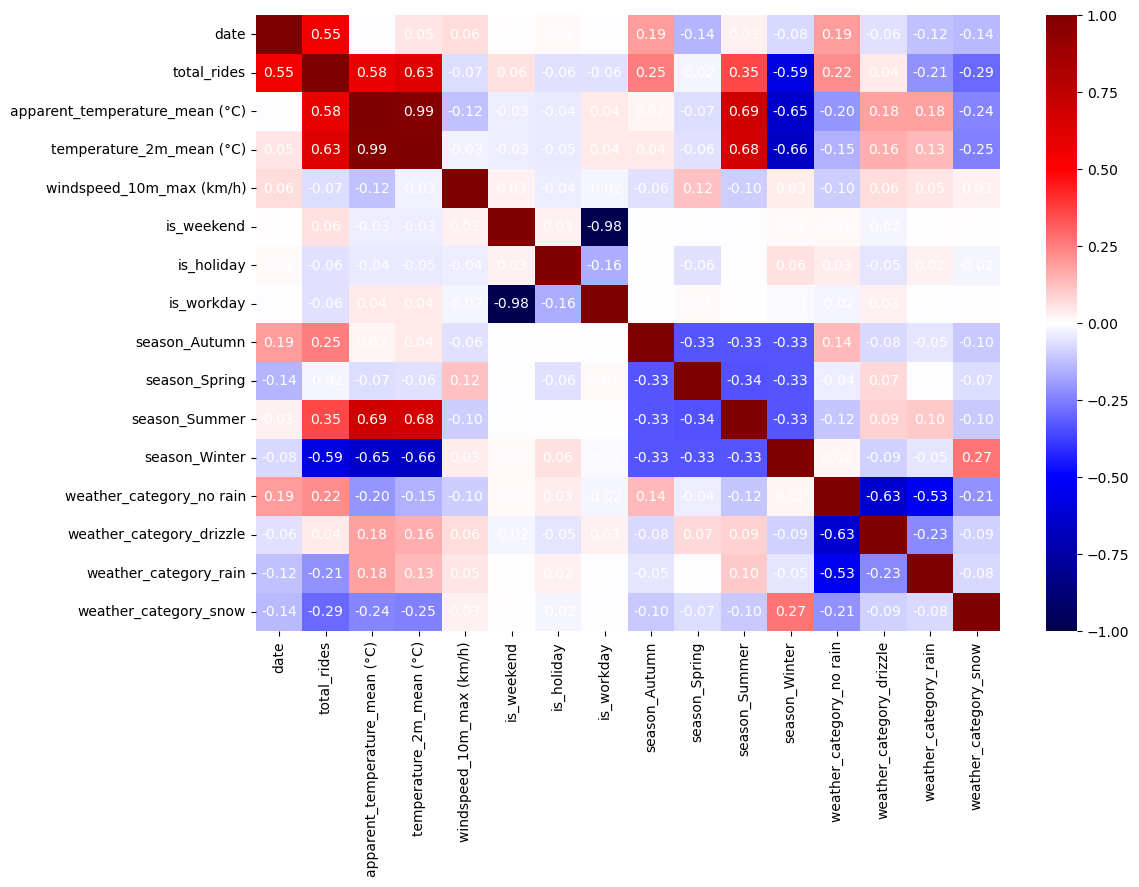

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Iterate over each pair of columns and calculate correlation
for i, col1 in enumerate(df_corr.columns):
    for j, col2 in enumerate(df_corr.columns):
        if i != j:
            correlation = df_corr[col1].corr(df_corr[col2])
            plt.text(j + 0.5, i + 0.5, f"{correlation:.2f}", ha='center', va='center', color='white')

sns.heatmap(df_corr.corr(), annot=False, vmin=-1, vmax=1, cmap='seismic')
plt.xticks(ticks=np.arange(len(df_corr.columns)) + 0.5, labels=df_corr.columns, rotation=90)
plt.yticks(ticks=np.arange(len(df_corr.columns)) + 0.5, labels=df_corr.columns, rotation=0)
plt.show()

# Univariate

In [346]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [347]:
total_rides_temperature = df_daily_weather[['total_rides','temperature_2m_mean (°C)']]

In [348]:
total_rides_date = df_daily_weather[['total_rides','date']]

In [349]:
total_rides_weather = df_daily_weather[['total_rides','encoded_weather_category']]

In [350]:
total_rides_windspeed = df_daily_weather[['total_rides','windspeed_10m_max (km/h)']]

In [351]:
total_rides_working_day = df_daily_weather[['total_rides','is_workday']]

In [352]:
total_rides_season = df_daily_weather[['total_rides','season_encoded']]

In [353]:
temperature = df_daily_weather['temperature_2m_mean (°C)']

In [354]:
date = df_daily_weather['date']

In [355]:
weather = df_daily_weather['weathercode (wmo code)']

In [356]:
windspeed = df_daily_weather['windspeed_10m_max (km/h)']

In [357]:
working_day = df_daily_weather['is_workday']

In [358]:
season = df_daily_weather['season_encoded']

In [359]:
total_rides = df_daily_weather['total_rides']

In [360]:
print(temperature.shape)
print(date.shape)
print(weather.shape)
print(windspeed.shape)
print(working_day.shape)
print(season.shape)
print(total_rides.shape)




(1095,)
(1095,)
(1095,)
(1095,)
(1095,)
(1095,)
(1095,)


In [361]:
temperature = temperature.values.reshape(-1, 1)
date = date.values.reshape(-1, 1)
weather = weather.values.reshape(-1, 1)
windspeed = windspeed.values.reshape(-1, 1)
working_day = working_day.values.reshape(-1, 1)
season = season.values.reshape(-1, 1)
total_rides = total_rides.values.reshape(-1, 1)




print(temperature.shape)
print(date.shape)
print(weather.shape)
print(windspeed.shape)
print(working_day.shape)
print(season.shape)
print(total_rides.shape)

(1095, 1)
(1095, 1)
(1095, 1)
(1095, 1)
(1095, 1)
(1095, 1)
(1095, 1)


In [362]:
print(total_rides.shape)
print(temperature.shape)
print(date.shape)
print(weather.shape)
print(windspeed.shape)
print(working_day.shape)
print(season.shape)

(1095, 1)
(1095, 1)
(1095, 1)
(1095, 1)
(1095, 1)
(1095, 1)
(1095, 1)


In [363]:
temperature_train, temperature_test, total_rides_train, total_rides_test = train_test_split(temperature, total_rides, test_size=0.2, random_state=0)

In [364]:
weather_train, weather_test, total_rides_train, total_rides_test = train_test_split(weather, total_rides, test_size=0.2, random_state=0)

In [365]:
windspeed_train, windspeed_test, total_rides_train, total_rides_test = train_test_split(windspeed, total_rides, test_size=0.2, random_state=0)

In [366]:
working_day_train, working_day_test, total_rides_train, total_rides_test = train_test_split(working_day, total_rides, test_size=0.2, random_state=0)

In [367]:
season_train, season_test, total_rides_train, total_rides_test = train_test_split(season, total_rides, test_size=0.2, random_state=0)

In [368]:
# Train the model temperature

reg_area_temperature = linear_model.LinearRegression()
reg_area_temperature.fit(temperature_train, total_rides_train)

LinearRegression()

In [369]:
# Train the model weather

reg_area_weather = linear_model.LinearRegression()
reg_area_weather.fit(weather_train, total_rides_train)

LinearRegression()

In [370]:
# Train the model windspeed

reg_area_windspeed = linear_model.LinearRegression()
reg_area_windspeed.fit(windspeed_train, total_rides_train)

LinearRegression()

In [371]:
# Train the model working_day

reg_area_working_day = linear_model.LinearRegression()
reg_area_working_day.fit(working_day_train, total_rides_train)

LinearRegression()

In [372]:
# Train the model season

reg_area_season = linear_model.LinearRegression()
reg_area_season.fit(season_train, total_rides_train)

LinearRegression()

In [373]:
# Predict values using test data.
reg_area_score = (reg_area_temperature.score(temperature_test, total_rides_test) * 100).round(2)
print("The accuracy of the ML model based on temperature is:", reg_area_score , "%")

The accuracy of the ML model based on temperature is: 40.06 %


In [374]:
# Predict values using test data.
reg_area_score = (reg_area_weather.score(weather_test, total_rides_test) * 100).round(2)
print("The accuracy of the ML model based on weather is:", reg_area_score , "%")

The accuracy of the ML model based on weather is: 6.46 %


In [375]:
# Predict values using test data.
reg_area_score = (reg_area_windspeed.score(windspeed_test, total_rides_test) * 100).round(2)
print("The accuracy of the ML model based on windspeed is:", reg_area_score , "%")

The accuracy of the ML model based on windspeed is: -2.31 %


In [376]:
# Predict values using test data.
reg_area_score = (reg_area_working_day.score(working_day_test, total_rides_test) * 100).round(2)
print("The accuracy of the ML model based on working_day is:", reg_area_score , "%")

The accuracy of the ML model based on working_day is: -1.83 %


In [377]:
# Predict values using test data.
reg_area_score = (reg_area_season.score(season_test, total_rides_test) * 100).round(2)
print("The accuracy of the ML model based on season is:", reg_area_score , "%")

The accuracy of the ML model based on season is: 8.75 %


In [318]:
df_daily_weather

,casual,date,member,total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),day,week,...,year,day_of_week,is_weekend,is_holiday,is_workday,season,day_of_week_encoded,season_encoded,weather_category,encoded_weather_category
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,53,...,2021,Friday,0,1,0,Winter,5.0,4.0,rain,2
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,2,53,...,2021,Saturday,1,0,0,Winter,6.0,4.0,rain,2
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,3,53,...,2021,Sunday,1,0,0,Winter,7.0,4.0,rain,2
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,4,1,...,2021,Monday,0,0,1,Winter,1.0,4.0,no rain,0
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,5,1,...,2021,Tuesday,0,0,1,Winter,2.0,4.0,drizzle,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,646,2023-12-27,1934,2580,-8.6,-4.3,71,10.1,27,52,...,2023,Wednesday,0,0,1,Winter,3.0,4.0,snow,3
1091,3099,2023-12-28,4819,7918,-7.0,-2.5,0,12.8,28,52,...,2023,Thursday,0,0,1,Winter,4.0,4.0,no rain,0
1092,3491,2023-12-29,5168,8659,-7.8,-3.9,1,9.5,29,52,...,2023,Friday,0,0,1,Winter,5.0,4.0,no rain,0
1093,3097,2023-12-30,4497,7594,-7.3,-2.9,1,13.8,30,52,...,2023,Saturday,1,0,0,Winter,6.0,4.0,no rain,0


# Multivariate

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Iterate over each pair of columns and calculate correlation
for i, col1 in enumerate(df_corr.columns):
    for j, col2 in enumerate(df_corr.columns):
        if i != j:
            correlation = df_corr[col1].corr(df_corr[col2])
            plt.text(j + 0.5, i + 0.5, f"{correlation:.2f}", ha='center', va='center', color='white')

sns.heatmap(df_corr.corr(), annot=False, vmin=-1, vmax=1, cmap='seismic')
plt.xticks(ticks=np.arange(len(df_corr.columns)) + 0.5, labels=df_corr.columns, rotation=90)
plt.yticks(ticks=np.arange(len(df_corr.columns)) + 0.5, labels=df_corr.columns, rotation=0)
plt.show()

NameError: name 'df_corr' is not defined

<Figure size 1200x800 with 0 Axes>

### 1st Try

In [14]:
df_daily_weather

,casual,date,member,total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),day,week,...,season,season_Autumn,season_Spring,season_Summer,season_Winter,weather_category,weather_category_no rain,weather_category_drizzle,weather_category_rain,weather_category_snow
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,53,...,Winter,0,0,0,1,rain,0,0,1,0
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,2,53,...,Winter,0,0,0,1,rain,0,0,1,0
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,3,53,...,Winter,0,0,0,1,rain,0,0,1,0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,4,1,...,Winter,0,0,0,1,no rain,1,0,0,0
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,5,1,...,Winter,0,0,0,1,drizzle,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,646,2023-12-27,1934,2580,-8.6,-4.3,71,10.1,27,52,...,Winter,0,0,0,1,snow,0,0,0,1
1091,3099,2023-12-28,4819,7918,-7.0,-2.5,0,12.8,28,52,...,Winter,0,0,0,1,no rain,1,0,0,0
1092,3491,2023-12-29,5168,8659,-7.8,-3.9,1,9.5,29,52,...,Winter,0,0,0,1,no rain,1,0,0,0
1093,3097,2023-12-30,4497,7594,-7.3,-2.9,1,13.8,30,52,...,Winter,0,0,0,1,no rain,1,0,0,0


In [14]:
multivariate= df_daily_weather.drop(['casual','date','member','total_rides','apparent_temperature_mean (°C)','weathercode (wmo code)','day','week','month','year','day_of_week','is_weekend','is_holiday','season','weather_category'],axis=1)
total_rides =df_daily_weather['total_rides']

In [146]:
multivariate

,temperature_2m_mean (°C),windspeed_10m_max (km/h),is_workday,season_Autumn,season_Spring,season_Summer,season_Winter,weather_category_no rain,weather_category_drizzle,weather_category_rain,weather_category_snow
0,2.3,10.6,0,0,0,0,1,0,0,1,0
1,7.6,19.1,0,0,0,0,1,0,0,1,0
2,3.9,13.0,0,0,0,0,1,0,0,1,0
3,4.1,13.3,1,0,0,0,1,1,0,0,0
4,4.0,9.2,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1090,-4.3,10.1,1,0,0,0,1,0,0,0,1
1091,-2.5,12.8,1,0,0,0,1,1,0,0,0
1092,-3.9,9.5,1,0,0,0,1,1,0,0,0
1093,-2.9,13.8,0,0,0,0,1,1,0,0,0


In [153]:
print(multivariate.shape)
print(total_rides.shape)

(1095, 11)
(1095, 1)


In [154]:
total_rides = total_rides.values.reshape(-1, 1)

print(total_rides.shape)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [19]:
#check for non-values

display(multivariate.info())
display(total_rides.info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   temperature_2m_mean (°C)  1095 non-null   float64
 1   windspeed_10m_max (km/h)  1095 non-null   float64
 2   is_workday                1095 non-null   int64  
 3   season_Autumn             1095 non-null   int64  
 4   season_Spring             1095 non-null   int64  
 5   season_Summer             1095 non-null   int64  
 6   season_Winter             1095 non-null   int64  
 7   weather_category_no rain  1095 non-null   int64  
 8   weather_category_drizzle  1095 non-null   int64  
 9   weather_category_rain     1095 non-null   int64  
 10  weather_category_snow     1095 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 94.2 KB


None

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [19]:
multivariate_01_train, multivariate_01_test, total_rides_train, total_rides_test = train_test_split(multivariate, total_rides, test_size=0.2, random_state=10)

In [89]:
# Train the model 

reg_multi_01 = linear_model.LinearRegression()
reg_multi_01.fit(multivariate_01_train, total_rides_train)

LinearRegression()

In [90]:
# Predict values using test data.
reg_multi_score = (reg_multi_01.score(multivariate_01_test, total_rides_test) * 100).round(2)
print("The accuracy of the ML model is:", reg_multi_score , "%")

#55.46% accurate

The accuracy of the ML model is: 59.32 %


In [81]:
predictions = [20,10,1,0,1,0,0,1,0,0,0]
pred= reg_multi_01.predict([predictions])

/Users/Lucasmeissner/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [104]:
print(f"Weather the following attributes:"
f"\nTemperature: {predictions[0]}"
f"\nWindspeed: {predictions[1]}"
f"\nIs_Workday: {predictions[2]}"
f"\nAutumn: {predictions[3]}"
f"\nSpring: {predictions[4]}"
f"\nSummer: {predictions[5]}"
f"\nWinter: {predictions[6]}"
f"\nNo Rain: {predictions[7]}"
f"\nDrizzle: {predictions[8]}"
f"\nRain: {predictions[9]}"
f"\nSnow: {predictions[10]}"
f"\n\nWill have around: {pred} Trips"
f"\n\nThis model is {reg_multi_score}% accurate" )

#Weather the following attributes:
#Temperature: 10.2
#Windspeed: 14.5
#Is_Workday: 0
#Season: 2.0
#Weathercode: 2

#Will have around: [[6996.36614779]] Trips

#This model is 55.46% accurate

#Weather the following attributes:
#Temperature: 14.9
#Windspeed: 14.7
#Is_Workday: 1
#Autumn: 0
#Spring: 0
#Summer: 0
#Winter: 0
#No Rain: 1
#Drizzle: 0
#Rain: 0
#Snow: 0

#Will have around: [[10587.76632228]] Trips

#This model is 59.32% accurate

Weather the following attributes:
Temperature: 20
Windspeed: 10
Is_Workday: 1
Autumn: 0
Spring: 1
Summer: 0
Winter: 0
No Rain: 1
Drizzle: 0
Rain: 0
Snow: 0

Will have around: [[11853.61909938]] Trips

This model is 59.32% accurate


In [164]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

lin.fit(multivariate, total_rides)

LinearRegression()

In [165]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 4 )
X_poly = poly.fit_transform(multivariate)
  
poly.fit(X_poly, total_rides)
lin2 = LinearRegression()
lin2.fit(X_poly, total_rides)

LinearRegression()

In [166]:
multivariate_01_test.shape

(219, 11)

In [168]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict the total rides using the trained model
total_rides_pred = lin2.predict(X_poly)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(total_rides, total_rides_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R^2) score
r2 = r2_score(total_rides, total_rides_pred)

print("Mean Squared Error (MSE):", mse) # try to find minimum 
print("Root Mean Squared Error (RMSE):", rmse) # minimum
print("R-squared (R^2) score:", r2)



#before dummies
#Mean Squared Error (MSE): 9540328.144649884
#Root Mean Squared Error (RMSE): 3088.7421622158563
#R-squared (R^2) score: 0.4400647649564281
#after dummies degree 4
#Mean Squared Error (MSE): 4901896.593734366
#Root Mean Squared Error (RMSE): 2214.02271752897
#R-squared (R^2) score: 0.712300816098117

#degree 1
#Mean Squared Error (MSE): 7012302.778340435
#Root Mean Squared Error (RMSE): 2648.075296954457
#R-squared (R^2) score: 0.5884381181805945

#degree 2
#Mean Squared Error (MSE): 7225942.1298979735
#Root Mean Squared Error (RMSE): 2688.1112569791403
#R-squared (R^2) score: 0.5758993250997705
#'\n\nWill have around: [[ 472.4375]\n [2243.    ]\n [ 869.8125]\n ...\n [4316.4375]\n [5464.625 ]\n [5690.3125]] Trips'

#degree 3
#Mean Squared Error (MSE): 5868681.117158229
#Root Mean Squared Error (RMSE): 2422.5360920238586
#R-squared (R^2) score: 0.6555588769161399
#'\n\nWill have around: [[ 611.05859375]\n [3400.36328125]\n [1140.64453125]\n ...\n [7552.6328125 ]\n [5605.37304688]\n [7019.5078125 ]] Trips'


#degree 4
#Mean Squared Error (MSE): 4901896.593734366
#Root Mean Squared Error (RMSE): 2214.02271752897
#R-squared (R^2) score: 0.712300816098117
#'\n\nWill have around: [[2383.58361816]\n [5262.359375  ]\n [3191.07470703]\n ...\n [6149.1640625 ]\n [4752.89306641]\n [6332.26782227]] Trips'


#degree 5
#Mean Squared Error (MSE): 4380050.926512573
#Root Mean Squared Error (RMSE): 2092.857120424749
#R-squared (R^2) score: 0.7429286699729513

#degree 6
#Mean Squared Error (MSE): 3722222.52689263
#Root Mean Squared Error (RMSE): 1929.3062294235797
#R-squared (R^2) score: 0.7815375410699157

#degree: 7 with wind
#Mean Squared Error (MSE): 3030161.3309647487
#Root Mean Squared Error (RMSE): 1740.7358590448894
#R-squared (R^2) score: 0.8221555829790638

#degree: 7 without wind --> reduced 
#Mean Squared Error (MSE): 5303562.325629984
#Root Mean Squared Error (RMSE): 2302.9464443686015
#R-squared (R^2) score: 0.688726491128588


#degree 8
#Mean Squared Error (MSE): 2532146.4802784724
#Root Mean Squared Error (RMSE): 1591.2719692995513
#R-squared (R^2) score: 0.85138477281889
#'\n\nWill have around: 9766.2070240075 Trips'

#degree 9
#Mean Squared Error (MSE): 2225211.717563266
#Root Mean Squared Error (RMSE): 1491.714355217937
#R-squared (R^2) score: 0.8693992043875108

#degree 10
#Mean Squared Error (MSE): 2002029.7974601279
#Root Mean Squared Error (RMSE): 1414.9310221562491
#R-squared (R^2) score: 0.8824980641956514



Mean Squared Error (MSE): 4901896.593734366
Root Mean Squared Error (RMSE): 2214.02271752897
R-squared (R^2) score: 0.712300816098117


In [171]:
from sklearn.preprocessing import PolynomialFeatures

# Assuming you have your test data stored in a variable called multivariate_01_test

# Create PolynomialFeatures object with degree 5
poly = PolynomialFeatures(degree=4)

# Transform test data using PolynomialFeatures
X_poly_test = poly.fit_transform(multivariate_01_test)

# Check the shape of transformed test data
print("Shape of transformed test data:", X_poly_test.shape)

Shape of transformed test data: (219, 1365)


In [178]:
# Assuming you have your input data stored in a list called predictions_02
predictions_02 = [24,10,0,0,0,1,0,1,0,0,0]
# Transform the input data using the same PolynomialFeatures object as used for training
X_poly_pred_02 = poly.transform([predictions_02])

# Predict values using the trained polynomial regression model
prediction_02 = lin2.predict(X_poly_pred_02)

# Print the prediction
print(f"Weather the following attributes:"
f"\nTemperature: {predictions_02[0]}"
f"\nWindspeed: {predictions_02[1]}"
f"\nIs_Workday: {predictions_02[2]}"
f"\nAutumn: {predictions_02[3]}"
f"\nSpring: {predictions_02[4]}"
f"\nSummer: {predictions_02[5]}"
f"\nWinter: {predictions_02[6]}"
f"\nNo Rain: {predictions_02[7]}"
f"\nDrizzle: {predictions_02[8]}"
f"\nRain: {predictions_02[9]}"
f"\nSnow: {predictions_02[10]}")

print("Predicted Trips:", prediction_02)

print("Mean Squared Error (MSE):", mse) # try to find minimum 
print("Root Mean Squared Error (RMSE):", rmse) # minimum
print("R-squared (R^2) score:", r2)

Weather the following attributes:
Temperature: 24
Windspeed: 10
Is_Workday: 0
Autumn: 0
Spring: 0
Summer: 1
Winter: 0
No Rain: 1
Drizzle: 0
Rain: 0
Snow: 0
Predicted Trips: [[14226.04101562]]
Mean Squared Error (MSE): 4901896.593734366
Root Mean Squared Error (RMSE): 2214.02271752897
R-squared (R^2) score: 0.712300816098117


/Users/Lucasmeissner/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


### 2nd Try

In [47]:
scaled_df= df_daily_weather.copy()

In [48]:
scaled_df

,casual,date,member,total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),day,week,...,season,season_Autumn,season_Spring,season_Summer,season_Winter,weather_category,weather_category_no rain,weather_category_drizzle,weather_category_rain,weather_category_snow
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,1,53,...,Winter,0,0,0,1,rain,0,0,1,0
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,2,53,...,Winter,0,0,0,1,rain,0,0,1,0
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,3,53,...,Winter,0,0,0,1,rain,0,0,1,0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,4,1,...,Winter,0,0,0,1,no rain,1,0,0,0
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,5,1,...,Winter,0,0,0,1,drizzle,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,646,2023-12-27,1934,2580,-8.6,-4.3,71,10.1,27,52,...,Winter,0,0,0,1,snow,0,0,0,1
1091,3099,2023-12-28,4819,7918,-7.0,-2.5,0,12.8,28,52,...,Winter,0,0,0,1,no rain,1,0,0,0
1092,3491,2023-12-29,5168,8659,-7.8,-3.9,1,9.5,29,52,...,Winter,0,0,0,1,no rain,1,0,0,0
1093,3097,2023-12-30,4497,7594,-7.3,-2.9,1,13.8,30,52,...,Winter,0,0,0,1,no rain,1,0,0,0


In [49]:
multivariate_2= scaled_df.drop(['casual','date','member','total_rides','apparent_temperature_mean (°C)','weathercode (wmo code)','day','week','month','year','day_of_week','is_weekend','is_holiday','season','weather_category'],axis=1)

In [50]:
import numpy as np
import pandas as pd

# Sample multivariate_2Frame

# Columns to log-transform
columns_to_transform = ['windspeed_10m_max (km/h)']

# Log-transform the selected columns
multivariate_2[columns_to_transform] = np.log(multivariate_2[columns_to_transform])

# Display the result
print(multivariate_2)


      temperature_2m_mean (°C)  windspeed_10m_max (km/h)  is_workday  \
0                          2.3                  2.360854           0   
1                          7.6                  2.949688           0   
2                          3.9                  2.564949           0   
3                          4.1                  2.587764           1   
4                          4.0                  2.219203           1   
...                        ...                       ...         ...   
1090                      -4.3                  2.312535           1   
1091                      -2.5                  2.549445           1   
1092                      -3.9                  2.251292           1   
1093                      -2.9                  2.624669           0   
1094                      -4.6                  2.322388           0   

      season_Autumn  season_Spring  season_Summer  season_Winter  \
0                 0              0              0              1   

In [51]:
import pandas as pd
import numpy as np


# Columns to apply Cube Root Transformation
columns_to_transform = ['temperature_2m_mean (°C)']

# Cube Root Transformation function
def cube_root_transform(x):
    return np.sign(x) * np.power(np.abs(x), 1/3)

# Apply Cube Root Transformation to the selected columns
multivariate_2[columns_to_transform] = multivariate_2[columns_to_transform].apply(cube_root_transform)

# Display the result
print(multivariate_2)


      temperature_2m_mean (°C)  windspeed_10m_max (km/h)  is_workday  \
0                     1.320006                  2.360854           0   
1                     1.966095                  2.949688           0   
2                     1.574061                  2.564949           0   
3                     1.600521                  2.587764           1   
4                     1.587401                  2.219203           1   
...                        ...                       ...         ...   
1090                 -1.626133                  2.312535           1   
1091                 -1.357209                  2.549445           1   
1092                 -1.574061                  2.251292           1   
1093                 -1.426043                  2.624669           0   
1094                 -1.663103                  2.322388           0   

      season_Autumn  season_Spring  season_Summer  season_Winter  \
0                 0              0              0              1   

In [52]:
print(multivariate.shape)
print(total_rides.shape)

(1095, 11)
(1095, 1)


In [53]:
total_rides = total_rides.values.reshape(-1, 1)

print(total_rides.shape)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [54]:
multivariate_2_train, multivariate_2_test, total_rides_train, total_rides_test = train_test_split(multivariate_2, total_rides, test_size=0.2, random_state=10)

In [55]:
# Train the model 

reg_multi_02 = linear_model.LinearRegression()
reg_multi_02.fit(multivariate_2_train, total_rides_train)

LinearRegression()

In [56]:
# Predict values using test data.
reg_multi_score_2 = (reg_multi_02.score(multivariate_2_test, total_rides_test) * 100).round(2)
print("The accuracy of the ML model is:", reg_multi_score , "%")

The accuracy of the ML model is: 59.32 %


In [58]:
predictions_2 = [14.9,14.7,1,0,0,0,0,1,0,0,0]
pred= reg_multi_02.predict([predictions_2])

/Users/Lucasmeissner/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [59]:
print(f"Weather the following attributes:"
f"\nTemperature: {predictions_2[0]}"
f"\nWindspeed: {predictions_2[1]}"
f"\nIs_Workday: {predictions_2[2]}"
f"\nAutumn: {predictions_2[3]}"
f"\nSpring: {predictions_2[4]}"
f"\nSummer: {predictions_2[5]}"
f"\nWinter: {predictions_2[6]}"
f"\nNo Rain: {predictions_2[7]}"
f"\nDrizzle: {predictions_2[8]}"
f"\nRain: {predictions_2[9]}"
f"\nSnow: {predictions_2[10]}"
f"\n\nWill have around: {pred} Trips"
f"\n\nThis model is {reg_multi_score_2}% accurate" )

Weather the following attributes:
Temperature: 14.9
Windspeed: 14.7
Is_Workday: 1
Autumn: 0
Spring: 0
Summer: 0
Winter: 0
No Rain: 1
Drizzle: 0
Rain: 0
Snow: 0

Will have around: [[25167.40615524]] Trips

This model is 56.04% accurate


In [60]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

lin.fit(multivariate_2, total_rides)

LinearRegression()

In [61]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
  
poly_2 = PolynomialFeatures(degree = 4)
X_poly_2 = poly_2.fit_transform(multivariate_2)
  
poly_2.fit(X_poly_2, total_rides)
lin3 = LinearRegression()
lin3.fit(X_poly_2, total_rides)

LinearRegression()

In [62]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict the total rides using the trained model
total_rides_pred_2 = lin3.predict(X_poly_2)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(total_rides, total_rides_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R^2) score
r2 = r2_score(total_rides, total_rides_pred)

print("Mean Squared Error (MSE):", mse) # try to find minimum 
print("Root Mean Squared Error (RMSE):", rmse) # minimum
print("R-squared (R^2) score:", r2)
print("R-squared (R^2) score:", r2)
f"\n\nWill have around: {total_rides_pred} Trips"

Mean Squared Error (MSE): 4901896.593734366
Root Mean Squared Error (RMSE): 2214.02271752897
R-squared (R^2) score: 0.712300816098117


In [ ]:
Mean Squared Error (MSE): 4901896.593734366
Root Mean Squared Error (RMSE): 2214.02271752897
R-squared (R^2) score: 0.712300816098117

In [476]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  
  # Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(solver='lbfgs', max_iter=100)
  log.fit(X_train, Y_train.ravel())
  
  # Using Linear Regression Algorithm to the Training Set
  linreg = linear_model.LinearRegression()
  linreg.fit(X_train, Y_train)

  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  # # Using SVC method of svm class to use Support Vector Machine Algorithm
  # from sklearn.svm import SVC
  # svc_lin = SVC(kernel = 'linear', random_state = 0)
  # svc_lin.fit(X_train, Y_train)

  # #Using SVC method of svm class to use Kernel SVM Algorithm
  # from sklearn.svm import SVC
  # svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  # svc_rbf.fit(X_train, Y_train)

  # #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  # from sklearn.naive_bayes import GaussianNB
  # gauss = GaussianNB()
  # gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train.ravel())

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train.ravel())
  
  #print model accuracy on the training data.
  print('Logistic Regression Training Accuracy:', (log.score(multivariate_2_test, total_rides_test))*100)
  print('Linear Regression Training Accuracy:', (linreg.score(multivariate_2_test, total_rides_test))*100)
  print('K Nearest Neighbor Training Accuracy:', knn.score(multivariate_2_test, total_rides_test))
  # print('Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(multivariate_01_test, total_rides_test))
  # print('Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(multivariate_01_test, total_rides_test))
  # print('Gaussian Naive Bayes Training Accuracy:', gauss.score(multivariate_01_test, total_rides_test))
  print('Decision Tree Classifier Training Accuracy:', (tree.score(multivariate_2_test, total_rides_test))*100)
  print('Random Forest Classifier Training Accuracy:', (forest.score(multivariate_2_test, total_rides_test))*100)

In [477]:
models(multivariate_2_train, total_rides_train)


/Users/Lucasmeissner/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Logistic Regression Training Accuracy: 0.0
Linear Regression Training Accuracy: 50.590789834571396
K Nearest Neighbor Training Accuracy: 0.0
Decision Tree Classifier Training Accuracy: 0.0
Random Forest Classifier Training Accuracy: 0.0


In [ ]:
#exporting csv file

df_daily_weather.to_csv('daily_weather_1.0.csv', index=False)

### Hourly Weather

In [ ]:
#import CSV hourly
df_hourly_weather= pd.read_csv("/Users/Lucasmeissner/Desktop/Capital Bike Share/CBS_2021-2023_Hourly_Weather.csv", sep= ',')

In [ ]:
df_hourly_weather.shape

#26280 rows
#9 columns

(26280, 9)

In [ ]:
#describe
df_hourly_weather.head(25)

#casual = number of casual (unregistered) riders per day
#member = number of (registered) riders per day
#date = date (daily)
#hour = hour of the day (24 per day --> 0-23)
#total_rides = total number of casual and member rides
#relativehumidity_2m (%) = humidity in % measured 2 m above the ground
#temperature_2m (°C) = mean of real temperature as measured 2 m above the ground
#weathercode (wmo code)	= code that declares the weather -->             more information here: https://www.nodc.noaa.gov/archive/arc0021/0002199/1.1/data/0-data/HTML/WMO-CODE/WMO4677.HTM
#windspeed_10m_max (km/h) = windspeed in km/H

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9
5,11.0,2021-01-01,5,3.0,14.0,75,1.4,2,8.7
6,8.0,2021-01-01,6,18.0,26.0,72,1.4,2,8.9
7,10.0,2021-01-01,7,17.0,27.0,71,1.4,3,7.9
8,22.0,2021-01-01,8,33.0,55.0,71,1.4,3,7.1
9,22.0,2021-01-01,9,54.0,76.0,70,1.6,3,7.2


In [ ]:
#rename columns into lower case letters
df_hourly_weather.rename(inplace=True,columns={
    'Casual': 'casual',
    'Date': 'date',
    'Member': 'member',
    'Total_rides': 'total_rides',
    'Hour':'hour'
})

In [ ]:
import pandas as pd

# Assuming your dataframe is named df_hourly_weather
# First, convert the 'date' column to datetime format
df_hourly_weather['date'] = pd.to_datetime(df_hourly_weather['date'])

# Extract year, month, and day from the 'date' column
df_hourly_weather['year'] = df_hourly_weather['date'].dt.year
df_hourly_weather['month'] = df_hourly_weather['date'].dt.month
df_hourly_weather['day'] = df_hourly_weather['date'].dt.day

# Display the modified dataframe
df_hourly_weather

,casual,date,hour,member,total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h),year,month,day
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,2021,1,1
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,2021,1,1
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,2021,1,1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,2021,1,1
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,2021,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
26275,132.0,2023-12-31,19,190.0,322.0,71,-7.7,0,3.3,2023,12,31
26276,125.0,2023-12-31,20,194.0,319.0,79,-10.2,0,6.7,2023,12,31
26277,84.0,2023-12-31,21,137.0,221.0,80,-11.0,0,10.0,2023,12,31
26278,83.0,2023-12-31,22,142.0,225.0,80,-10.4,0,8.7,2023,12,31


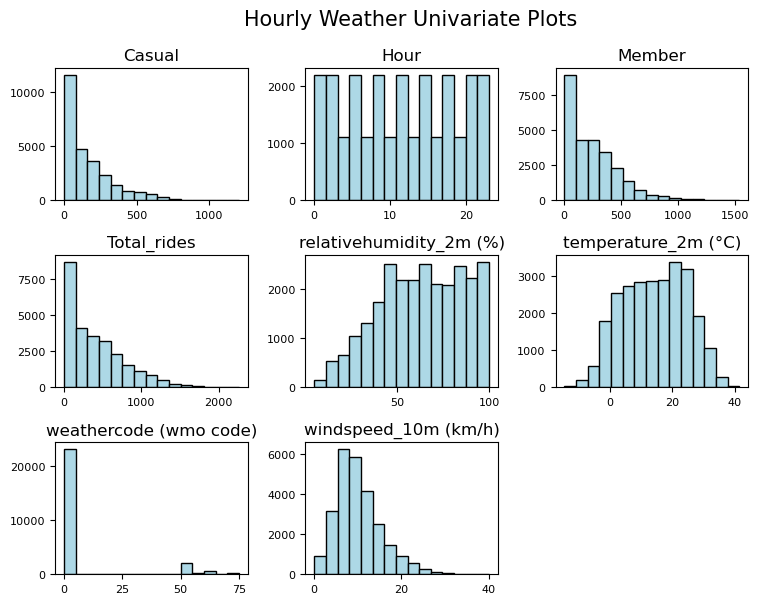

In [ ]:
df_hourly_weather.hist(bins=15, color='lightblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('Hourly Weather Univariate Plots', x=0.65, y=1.25, fontsize=15)

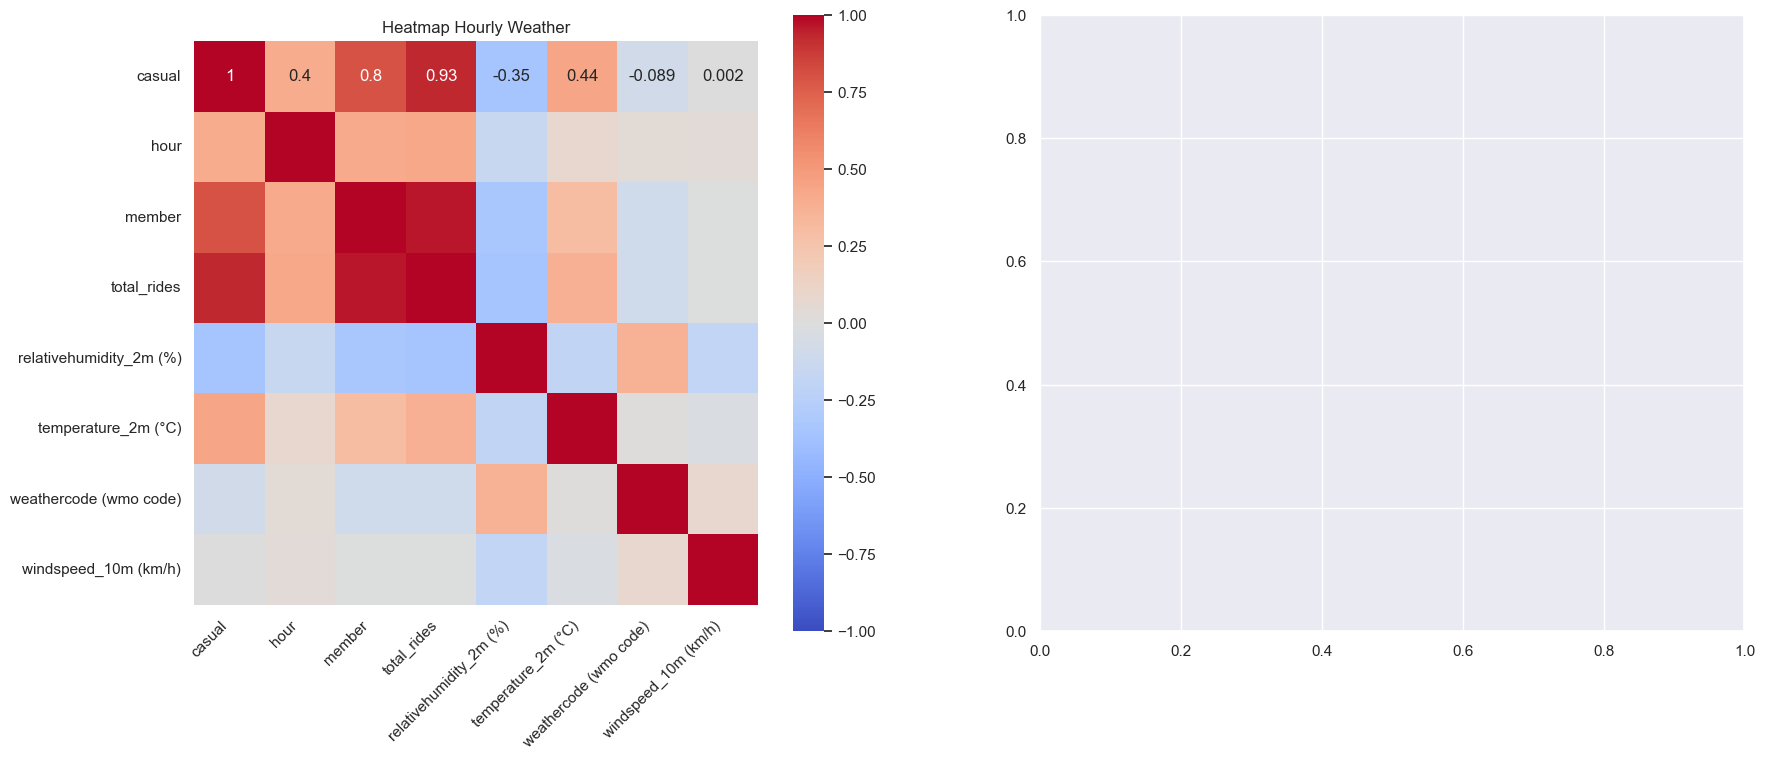

In [ ]:
fig ,axs = plt.subplots(1,2,figsize=(20,8))

data = df_hourly_weather

corr = df_hourly_weather[['casual','hour','member','total_rides','relativehumidity_2m (%)','temperature_2m (°C)','weathercode (wmo code)','windspeed_10m (km/h)']].corr()
ax1 = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap="coolwarm",
    square=True,
    annot=True,
    ax=axs[0]
)

ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax1.set(title='Heatmap Hourly Weather')
sns.set(rc = {'figure.figsize':(20,8)})

### Data Cleaning

In [ ]:
#drop duplicates
#before dropping (10693997, 13)
#after dropping (10693997, 13)
df_CBS.drop_duplicates(inplace=True)

In [ ]:
df_CBS.head(20)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,distance in km
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member,0 days 00:25:20,4.367593
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual,0 days 00:15:51,4.787179
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member,0 days 00:14:13,1.138843
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member,0 days 00:05:35,0.000000
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member,0 days 00:03:14,0.414050
5,0FD3B4B2152425C3,electric_bike,2021-01-01 00:18:16,2021-01-01 00:29:05,NaN,NaN,Georgia Ave & Kennedy St NW,31415.0,38.930000,-77.030000,38.956738,-77.027940,casual,0 days 00:10:49,2.978409
6,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,38.867373,-76.988039,casual,0 days 00:17:22,3.701002
7,78894BDABD9F21DD,electric_bike,2021-01-01 00:20:40,2021-01-01 00:35:36,Columbia Rd & Georgia Ave NW,31115.0,NaN,NaN,38.928081,-77.023768,38.900000,-77.020000,casual,0 days 00:14:56,3.139417
8,CB36F43FA77E4A35,docked_bike,2021-01-01 00:21:19,2021-01-01 00:33:31,15th & F St NE,31632.0,1st & M St SE,31650.0,38.897195,-76.983575,38.876893,-77.006072,casual,0 days 00:12:12,2.981223
9,874D92427D41BC30,classic_bike,2021-01-01 00:21:39,2021-01-01 00:31:07,14th & Otis Pl NW,31131.0,14th & R St NW,31202.0,38.934405,-77.032687,38.913046,-77.032008,member,0 days 00:09:28,2.375739


In [ ]:
df_CBS['rideable_type'].unique()
#rideable_type = array(['classic_bike', 'electric_bike', 'docked_bike'], dtype=object)
#member_casual= array(['member', 'casual'], dtype=object)

array(['classic_bike', 'electric_bike', 'docked_bike'], dtype=object)

### Setting Correct Dtypes

### Full Dataset

In [ ]:
df_CBS.info()

#ride_id = string
#rideable_type= string
#started_at = datetime (unit=s)
#ended_at= datetime (unit=s)
#start_station_name= string
#start_station_id =float
#end_station_name = string
#end_station_id = float
#start_lat = float
#start_lng =float
#end_lat = float
#member_casual = string
#member_casual_num =int
#rideable_type_num =int



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 1.0+ GB


In [ ]:
#converting started_at and ended_at into datetime64[ns]

df_CBS['started_at']=df_CBS['started_at'].astype('datetime64[ns]')
df_CBS['ended_at']=df_CBS['ended_at'].astype('datetime64[ns]')

In [ ]:
# Replace 'MTL-ECO5-03' with '10000' in 'start_station_id' column since it is the only station name in the dataset that is not a number
df_CBS['start_station_id'] = df_CBS['start_station_id'].replace('MTL-ECO5-03', '10000')

# Replace 'MTL-ECO5-03' with '10000' in 'end_station_id' column since it is the only station name in the dataset that is not a number
df_CBS['end_station_id'] = df_CBS['end_station_id'].replace('MTL-ECO5-03', '10000')

In [ ]:
#converting start and end_station_id into float

df_CBS['start_station_id']=df_CBS['start_station_id'].astype(float)
df_CBS['end_station_id']=df_CBS['end_station_id'].astype(float)


In [ ]:
df_CBS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    float64       
 6   end_station_name    object        
 7   end_station_id      float64       
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(6), object(5)
memory usage: 1.0+ GB


### For Daily Weather

In [ ]:
df_CBS["start_station_id"].value_count()

NameError: name 'df_CBS' is not defined

### Features

In [ ]:
#Time per Ride
df_CBS['ride_duration'] = df_CBS['ended_at'] - df_CBS['started_at']

#converting ride_duration into decimal minutes

df_CBS['ride_duration'] = pd.to_timedelta(df_CBS['ride_duration'])

In [ ]:
#converting ride_duration into decimal minutes

df_CBS['ride_duration'] = pd.to_timedelta(df_CBS['ride_duration'])

In [ ]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine calculation
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Radius of the Earth in kilometers. Use 3956 for miles
    radius_earth = 6371

    # Calculation of distance
    distance = c * radius_earth
    return distance


# Calculate the distance for each ride in the DataFrame
df_CBS['distance in km'] = haversine(df_CBS['start_lat'], df_CBS['start_lng'], df_CBS['end_lat'], df_CBS['end_lng'])

# Display the DataFrame with the new column for distance
print(df_CBS[['ride_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'distance in km']])



                   ride_id  start_lat  start_lng    end_lat    end_lng  \
0         5CB9DFCECF79AF84  38.880440 -77.025236  38.894600 -77.072305   
1         629E059504606547  38.917193 -77.025894  38.960000 -77.020000   
2         E74069873161EE33  38.912138 -77.038568  38.920870 -77.031691   
3         91F95E512CABC46A  38.879477 -77.114563  38.879477 -77.114563   
4         DA46A05139C0EA2F  38.931322 -77.028247  38.931991 -77.032956   
...                    ...        ...        ...        ...        ...   
10693992  1E69FA72F720F2E7  38.806002 -77.055911  38.804718 -77.043363   
10693993  BA9E9FDBFAFDE618  38.884185 -76.995396  38.890461 -76.988355   
10693994  F3B6C6BFB1F738D0  38.909394 -77.048728  38.896104 -77.049882   
10693995  D2DB18DB58BC83D2  38.909394 -77.048728  38.909394 -77.048728   
10693996  095E4B13F44E3643  38.907130 -77.000966  38.920000 -77.000000   

          distance in km  
0               4.367593  
1               4.787179  
2               1.138843  
3  

In [ ]:
#price per ride
#pricing model --> https://capitalbikeshare.com/pricing
#casuals + classic bikes 1 dollar + 0,05 cent/min
#casuals + ebikes 1 dollar unlock fee + 0,15 cent/min
#members + classic 45 mins free then 0,05 min
#members + ebikes 0,10 cent/min

In [ ]:
import pandas as pd

def calculate_ride_price(row):
    if row['member_casual'] == 'casual':
        if row['rideable_type'] == 'classic_bike' or row['rideable_type'] == 'docked_bike':  # docked_bike bikes have same pricing as classic_bike
            price = 1 + 0.05 * row['ride_duration']
        elif row['rideable_type'] == 'electric_bike':
            price = 1 + 0.15 * row['ride_duration']
    elif row['member_casual'] == 'members':
        if row['rideable_type'] == 'classic_bike' or row['rideable_type'] == 'docked_bike':  # docked_bike bikes have same pricing as classic_bike
            if row['ride_duration'] <= 45:
                price = 0
            else:
                price = 0.05 * (row['ride_duration'] - 45)
        elif row['rideable_type'] == 'electric_bike':
            price = 0.10 * row['ride_duration']
    return price

df_CBS['price_per_ride'] = df_CBS.apply(calculate_ride_price, axis=1)

print(df_CBS)


: 

### Encoding

In [ ]:
df_CBS['rideable_type'].unique()
#rideable_type = array(['classic_bike', 'electric_bike', 'docked_bike'], dtype=object)
#member_casual= array(['member', 'casual'], dtype=object)

array(['classic_bike', 'electric_bike', 'docked_bike'], dtype=object)

In [ ]:
#creating rideable_type_num by encoding rideable_type with classic_bike=0 electric_bike=1 and docked_bike=2

ordinal_encoder= OrdinalEncoder(categories=[['classic_bike','electric_bike','docked_bike']],dtype=int)

df_CBS['rideable_type_num']=ordinal_encoder.fit_transform(df_CBS[['rideable_type']])



In [ ]:
#creating member_casual_num by encoding member_casual with member=0, casual =1

ordinal_encoder= OrdinalEncoder(categories=[['member','casual']],dtype=int)

df_CBS['member_casual_num']=ordinal_encoder.fit_transform(df_CBS[['member_casual']])

### Replacing Missing Values with Machine Learning Predictions


In [ ]:
import pandas as pd

# Assuming your dataset is stored in a CSV file named 'data.csv'
data = df_CBS

# Iterate through each row
for index, row in data.iterrows():
    # Check if start_station_name or start_station_id is missing
    if pd.isnull(row['start_station_name']) or pd.isnull(row['start_station_id']):
        # Find a matching row with complete start location data
        matching_rows = data[(~data['start_station_name'].isnull()) & (~data['start_station_id'].isnull()) & 
                             (data['start_lat'] == row['start_lat']) & (data['start_lng'] == row['start_lng'])]
        if not matching_rows.empty:
            match_row = matching_rows.iloc[0]
            # Fill missing values with the matched row's values
            data.at[index, 'start_station_name'] = match_row['start_station_name']
            data.at[index, 'start_station_id'] = match_row['start_station_id']
    
    # Check if end_station_name or end_station_id is missing
    if pd.isnull(row['end_station_name']) or pd.isnull(row['end_station_id']):
        # Find a matching row with complete end location data
        matching_rows = data[(~data['end_station_name'].isnull()) & (~data['end_station_id'].isnull()) & 
                             (data['end_lat'] == row['end_lat']) & (data['end_lng'] == row['end_lng'])]
        if not matching_rows.empty:
            match_row = matching_rows.iloc[0]
            # Fill missing values with the matched row's values
            data.at[index, 'end_station_name'] = match_row['end_station_name']
            data.at[index, 'end_station_id'] = match_row['end_station_id']

# Print the modified dataset
print(data)



KeyboardInterrupt: 

In [ ]:
#make a copy of the dataset
df_ML =df_CBS.copy()

In [ ]:
df_ML.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,rideable_type_num,member_casual_num
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member,0,0
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual,1,1
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member,1,0
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member,0,0
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member,0,0


In [ ]:
df_ML.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    742776
start_station_id      742776
end_station_name      811282
end_station_id        811282
start_lat                  2
start_lng                  2
end_lat                16765
end_lng                16765
member_casual              0
dtype: int64

In [ ]:
# for start lat and lng finding out indexes that have no data

df_ML[df_ML['start_lng'].isnull()].index.tolist()

[133129, 143000]

In [ ]:
#creating test group with missing values in end_station_name and end_station id

test_data = df_ML[df_ML['end_station_name'].isnull() | df_ML['end_station_id'].isnull()]

In [ ]:
test_data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,rideable_type_num,member_casual_num
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.96,-77.02,casual,1,1
7,78894BDABD9F21DD,electric_bike,2021-01-01 00:20:40,2021-01-01 00:35:36,Columbia Rd & Georgia Ave NW,31115.0,NaN,NaN,38.928081,-77.023768,38.90,-77.02,casual,1,1
17,3F8AFD9540FF8EDB,electric_bike,2021-01-01 00:26:41,2021-01-01 00:30:09,14th & Harvard St NW,31105.0,NaN,NaN,38.926715,-77.032145,38.93,-77.04,member,1,0
20,997E8E08C493F034,electric_bike,2021-01-01 00:27:18,2021-01-01 00:34:30,NaN,NaN,NaN,NaN,38.990000,-77.030000,38.99,-77.03,member,1,0
21,F1F87FA560990FC7,electric_bike,2021-01-01 00:28:39,2021-01-01 00:41:31,Connecticut Ave & Newark St NW / Cleveland Park,31305.0,NaN,NaN,38.934253,-77.058010,38.92,-77.07,member,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10693970,C23F1DB65A85FB04,electric_bike,2023-12-31 23:47:46,2023-12-31 23:59:18,14th & L St NW,31283.0,NaN,NaN,38.903728,-77.031661,38.90,-77.02,member,1,0
10693977,EA4524CC5F528237,electric_bike,2023-12-31 23:51:14,2023-12-31 23:59:49,NaN,NaN,NaN,NaN,38.910000,-77.020000,38.92,-77.04,member,1,0
10693985,52DD927885B2A4E9,electric_bike,2023-12-31 23:54:07,2024-01-01 00:01:39,Fort Totten Metro,31515.0,NaN,NaN,38.952364,-77.002654,38.96,-76.98,member,1,0
10693988,5982B1B6C2B49DA9,electric_bike,2023-12-31 23:56:22,2023-12-31 23:59:14,14th & Irving St NW,31124.0,NaN,NaN,38.928623,-77.032059,38.93,-77.04,member,1,0


In [ ]:
#Drop the null values from the dattaframe and define as train data
train_data= df_ML.dropna() 

In [ ]:
train_data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,rideable_type_num,member_casual_num
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member,0,0
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member,1,0
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member,0,0
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member,0,0
6,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,38.867373,-76.988039,casual,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10693991,5FFF7B5DE01103EE,classic_bike,2023-12-31 23:57:56,2024-01-01 00:02:25,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,Lincoln Park / 13th & East Capitol St NE,31619.0,38.884095,-76.995234,38.890461,-76.988355,casual,0,1
10693992,1E69FA72F720F2E7,classic_bike,2023-12-31 23:58:06,2024-01-01 00:12:29,King St & Peyton St,31955.0,Market Square / King St & Royal St,31042.0,38.806002,-77.055911,38.804718,-77.043363,member,0,0
10693993,BA9E9FDBFAFDE618,electric_bike,2023-12-31 23:58:27,2024-01-01 00:02:28,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,Lincoln Park / 13th & East Capitol St NE,31619.0,38.884185,-76.995396,38.890461,-76.988355,member,1,0
10693994,F3B6C6BFB1F738D0,classic_bike,2023-12-31 23:59:27,2024-01-01 02:09:11,22nd & P ST NW,31285.0,23rd & E St NW,31260.0,38.909394,-77.048728,38.896104,-77.049882,casual,0,1


In [ ]:
x_train=df_ML.drop(['end_station_name','end_station_id'],axis=1)

In [ ]:
x_train

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,rideable_type_num,member_casual_num
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,38.880440,-77.025236,38.894600,-77.072305,member,0,0
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,38.912138,-77.038568,38.920870,-77.031691,member,1,0
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member,0,0
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,38.931322,-77.028247,38.931991,-77.032956,member,0,0
6,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,38.900413,-76.982872,38.867373,-76.988039,casual,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10693991,5FFF7B5DE01103EE,classic_bike,2023-12-31 23:57:56,2024-01-01 00:02:25,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,38.884095,-76.995234,38.890461,-76.988355,casual,0,1
10693992,1E69FA72F720F2E7,classic_bike,2023-12-31 23:58:06,2024-01-01 00:12:29,King St & Peyton St,31955.0,38.806002,-77.055911,38.804718,-77.043363,member,0,0
10693993,BA9E9FDBFAFDE618,electric_bike,2023-12-31 23:58:27,2024-01-01 00:02:28,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,38.884185,-76.995396,38.890461,-76.988355,member,1,0
10693994,F3B6C6BFB1F738D0,classic_bike,2023-12-31 23:59:27,2024-01-01 02:09:11,22nd & P ST NW,31285.0,38.909394,-77.048728,38.896104,-77.049882,casual,0,1


In [ ]:
y_train = df_ML[['end_station_name','end_station_id']]

In [ ]:
y_train

,end_station_name,end_station_id
0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0
2,14th & Belmont St NW,31119.0
3,Wilson Blvd. & N. Vermont St.,31926.0
4,14th & Newton St NW,31649.0
6,Good Hope Rd & MLK Ave SE,31802.0
...,...,...
10693991,Lincoln Park / 13th & East Capitol St NE,31619.0
10693992,Market Square / King St & Royal St,31042.0
10693993,Lincoln Park / 13th & East Capitol St NE,31619.0
10693994,23rd & E St NW,31260.0


In [ ]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

: 

In [ ]:
#Build the classification model

In [ ]:
#create the x_test from test data

In [ ]:
#apply the model on x_test of test data to make predictions

In [ ]:
#replace the missing values with predicted values